# Chemical trigonometry

* CRN synthesis from
 * GPAC circuits
 * PIVP definitions of functions of time
 * PIVP definitions of input/output functions
* Trigonometric functions for oscillators

F. Fages, Feb. 2019, 2020

# GPAC generating cosine(t)

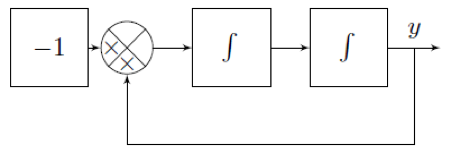

In [1]:
compile_wgpac(y::integral integral-1*y).

In [2]:
present(y,1).

In [3]:
list_model.

fast*[x2]*[y] for x2+y=>x1+x2+y.
fast*[x1] for x1=>_.
'MA'(1) for x1=>x0+x1.
'MA'(1) for x0=>y+x0.
present(x2,-1).
present(y,1).
parameter(
  fast = 1000
).


In [4]:
list_ode.

In [5]:
numerical_simulation.

In [6]:
plot.

In [7]:
plot(against:y).

# PIVP generation of cosine(time)

In [8]:
clear_model.

In [9]:
compile_from_expression(cos, time, costime).

In [10]:
list_model.

fast*costime_p*costime_m for costime_p+costime_m=>_.
fast*A_p*A_m for A_p+A_m=>_.
'MA'(1) for A_p=>costime_p+A_p.
'MA'(1) for A_m=>costime_m+A_m.
'MA'(1) for costime_m=>A_p+costime_m.
'MA'(1) for costime_p=>A_m+costime_p.
present(costime_p,1).
parameter(
  fast = 1000
).


In [11]:
search_conservations.

No complex invariant found


In [12]:
list_ode.

In [13]:
numerical_simulation.

In [14]:
plot.

In [15]:
plot(against:A_p).

In [16]:
plot(against:A_m).

In [17]:
numerical_simulation(method:ssa).

In [18]:
plot.

In [19]:
plot(against:A_p).

# PIVP generation of cosine(time)+1

In [20]:
compile_from_expression(cos+1, costime1).

In [21]:
list_model.

fast*costime1_p*costime1_m for costime1_p+costime1_m=>_.
fast*C_p*C_m for C_p+C_m=>_.
fast*B_p*B_m for B_p+B_m=>_.
'MA'(1) for B_p=>costime1_p+B_p.
'MA'(1) for B_m=>costime1_m+B_m.
'MA'(1) for B_p=>C_p+B_p.
'MA'(1) for B_m=>C_m+B_m.
'MA'(1) for C_m=>B_p+C_m.
'MA'(1) for C_p=>B_m+C_p.
present(costime1_p,2).
present(C_p,1).
present(A,1).
parameter(
  fast = 1000
).


In [22]:
numerical_simulation. plot.

In [23]:
numerical_simulation(method:ssa). plot.

# PIVP computation of cosine(x)

In [24]:
clear_model.

In [25]:
compile_from_expression(cos, x, cosx).

In [26]:
parameter(input=4).

In [27]:
list_model.

fast*cosx_p*cosx_m for cosx_p+cosx_m=>_.
fast*A_p*A_m for A_p+A_m=>_.
'MA'(1) for A_p+x=>cosx_p+A_p+x.
'MA'(1) for A_m+x=>cosx_m+A_m+x.
'MA'(1) for cosx_m+x=>A_p+cosx_m+x.
'MA'(1) for cosx_p+x=>A_m+cosx_p+x.
'MA'(1) for x=>_.
present(cosx_p,1).
present(x,input).
parameter(
  fast = 1000,
  input = 4
).


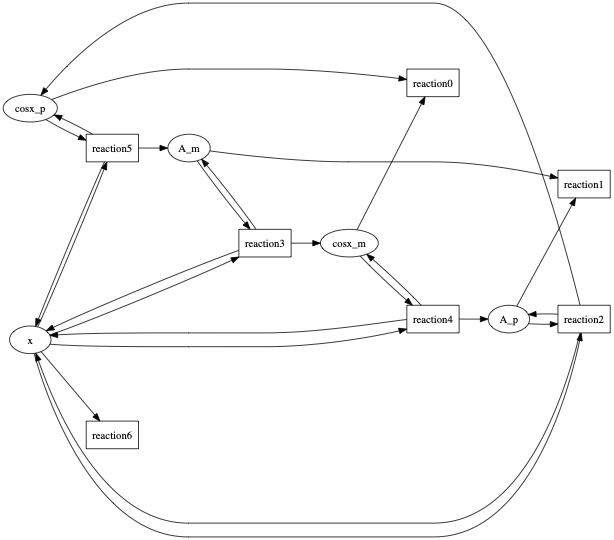

In [28]:
draw_reactions.

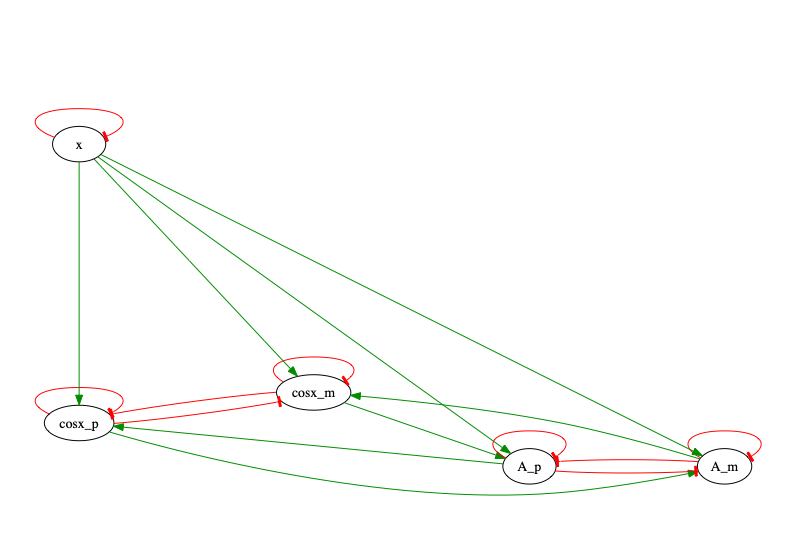

In [29]:
draw_influences.

In [30]:
list_ode.

In [31]:
numerical_simulation.

In [32]:
plot.

# Verification of dynamical properties (teasing for next course)
## Quantitative temporal logic FO-Linear Time Logic with linear constraints

* linear constraints on states involving free variables, molecular concentrations and parameters

* temporal operators:

* F "finally" at some time point in the future (state reachability)

* G "globally" at all time points in the future (state stability)

In [33]:
validity_domain(F(G(cosx_m=v))). % value v of reachable stable state

v=0.653644


In [34]:
validity_domain(F(((cosx_m > 6e-1) /\ (Time < t)))). % with time information

t>1.00391


In [35]:
satisfaction_degree(F(G(cosx_m=v)), [v -> 0.653644]).

1.000000


## Robustness  and parameter sensitivity (teasing for next course)

### Parametrization of the model
* automatic introduction of kinetic parameters for all reactions

In [36]:
parametrize.

In [37]:
list_model.

fast*cosx_p*cosx_m for cosx_p+cosx_m=>_.
fast*A_p*A_m for A_p+A_m=>_.
'MA'(k_2) for A_p+x=>cosx_p+A_p+x.
'MA'(k_3) for A_m+x=>cosx_m+A_m+x.
'MA'(k_4) for cosx_m+x=>A_p+cosx_m+x.
'MA'(k_5) for cosx_p+x=>A_m+cosx_p+x.
'MA'(k_6) for x=>_.
present(x,input).
present(cosx_p,k_1).
parameter(
  fast = 1000,
  input = 4,
  k_1 = 1,
  k_2 = 1,
  k_3 = 1,
  k_4 = 1,
  k_5 = 1,
  k_6 = 1
).


In [38]:
numerical_simulation. plot.

### Extrinsic variability
* mean satisfaction degree over parameter variation
* robustness analysis: global variation of several parameters, 
* sensitivity analysis variation of one parameter or one pair of parameters

In [39]:
% no parameter variation
robustness(F(G(cosx_m=v)), [k_1, k_2, k_3, k_4, k_5, k_6], [v -> 0.653644], robustness_coeff_var:0). 

Time: 2.447 s
Robustness degree: 0.999999


In [40]:
% parameter variation by 10%
robustness(F(G(cosx_m=v)), [k_1, k_2, k_3, k_4, k_5, k_6], [v -> 0.653644], robustness_coeff_var:0.1). 

Time: 2.51 s
Robustness degree: 0.836887


In [41]:
% parameter variation by 20%
robustness(F(G(cosx_m=v)), [k_1, k_2, k_3, k_4, k_5, k_6], [v -> 0.653644], robustness_coeff_var:0.2). 

Time: 2.466 s
Robustness degree: 0.80594


### Intrinsic variability
* variability with respect to stochasticity
* robustness analysis with respect to both extrinsic and intrinsic noise

In [42]:
option(method:ssa). 

In [43]:
numerical_simulation. plot.

In [44]:
validity_domain(F(G(cosx_m=v))).

v=14


In [45]:
% Intrinsic variability: stochastic simulations without kinetic parameter variation
robustness(F(G(cosx_m=v)), [k_1, k_2, k_3, k_4, k_5, k_6], [v -> 65], robustness_coeff_var:0). 

Time: 96.719 s
Robustness degree: 0.101806912


### Mixed intrinsic and extrinsic variability
* stochastic simulations together with parameter variation of 10%

In [46]:
% Mixed intrinsic and extrinsic variability: stochastic simulations with parameter variation of 10%
robustness(F(G(cosx_m=v)), [k_1, k_2, k_3, k_4, k_5, k_6], [v -> 65], robustness_coeff_var:0.1).

Time: 112.433 s
Robustness degree: 0.043717376499999995


# Question on the differential semantics

In [47]:
option(method:bsimp).

In [48]:
numerical_simulation. plot.

## Determine the most sensitive parameter for the computation of cos(4) 
interpret this result